In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import MSTL
import os

In [2]:
FILE_DIR = './load.csv'
FIG_DIR = './trend_plots/'

In [3]:
if not os.path.exists(FIG_DIR):
    os.makedirs(FIG_DIR)

In [4]:
data = pd.read_csv(FILE_DIR)
# Convert the 'date' column to datetime format
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%Y/%m/%d %H:%M')
display(data)

,Timestamp,Load
0,2023-01-01 00:00:00,10.89
1,2023-01-01 00:15:00,10.44
2,2023-01-01 00:30:00,10.89
3,2023-01-01 00:45:00,10.29
4,2023-01-01 01:00:00,10.34
...,...,...
35035,2023-12-31 22:45:00,8.10
35036,2023-12-31 23:00:00,6.62
35037,2023-12-31 23:15:00,8.94
35038,2023-12-31 23:30:00,8.25


In [5]:
decomposition = MSTL(data['Load'], periods=2688).fit()

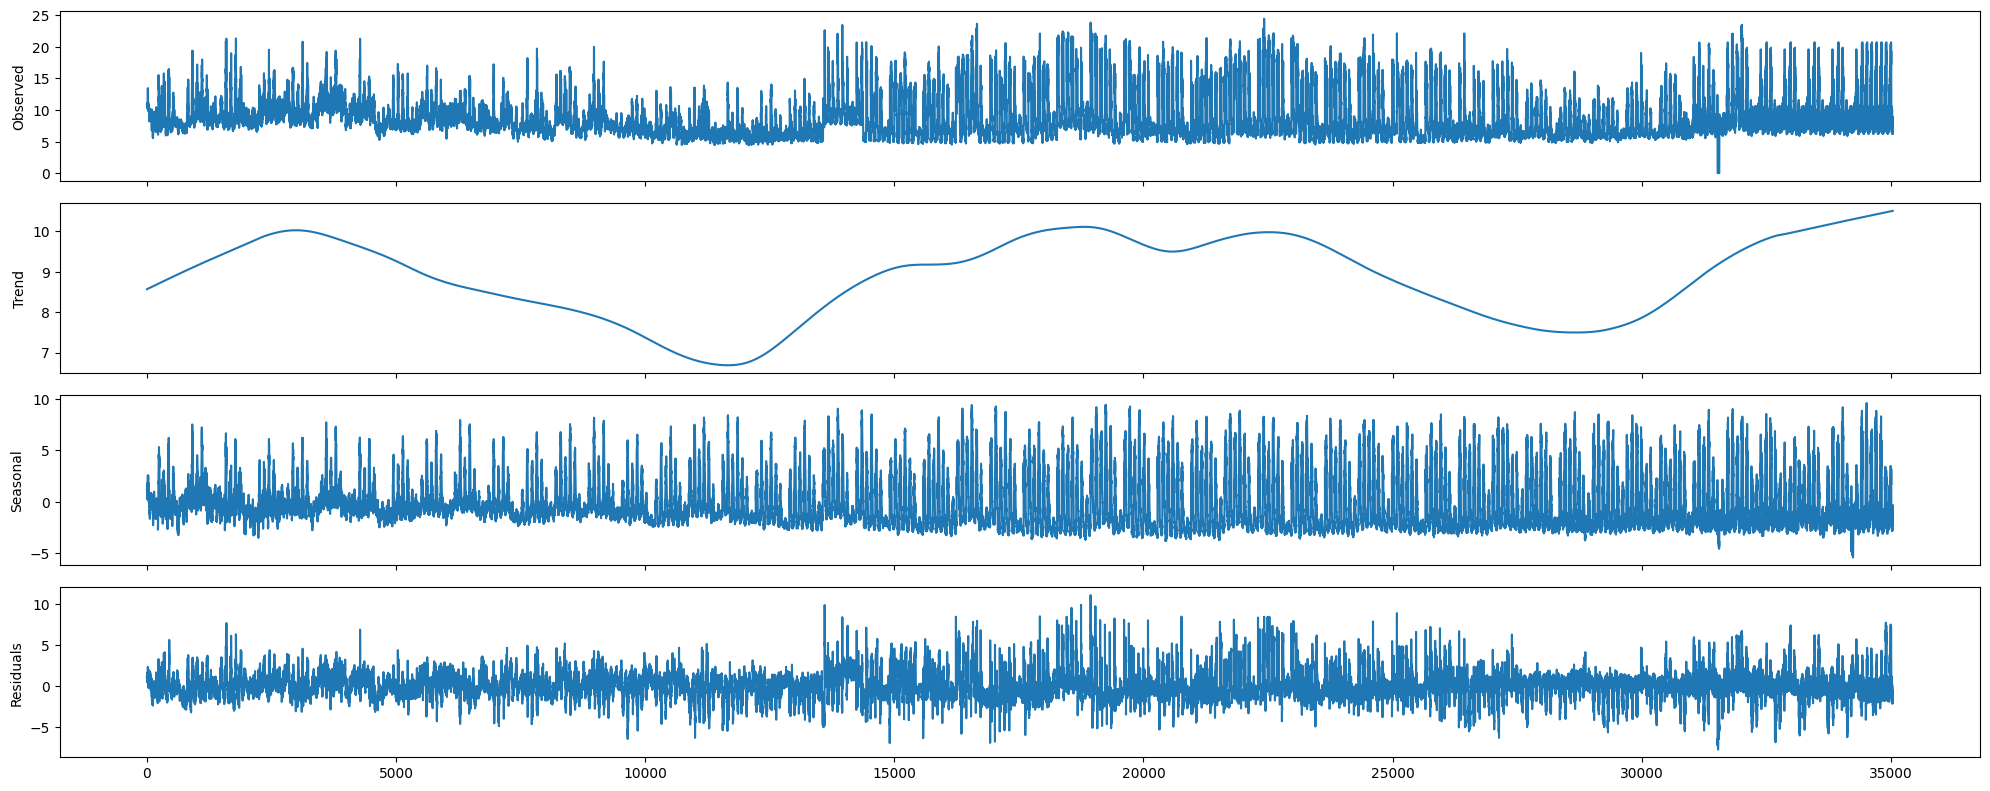

In [7]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True,figsize=(20,8))

ax1.plot(decomposition.observed)
# ax1.set_xlim(15000, 20000)
ax1.set_ylabel('Observed')

ax2.plot(decomposition.trend)
# ax2.set_xlim(15000, 20000)
ax2.set_ylabel('Trend')

ax3.plot(decomposition.seasonal)
# ax3.set_xlim(15000, 20000)
ax3.set_ylabel('Seasonal')

ax4.plot(decomposition.resid)
# ax4.set_xlim(15000, 20000)
ax4.set_ylabel('Residuals')

plt.tight_layout()
plt.savefig(FIG_DIR+'decomposition.png')

In [8]:
data['Trend'] = np.array(decomposition.trend)
data['Seasonal'] = np.array(decomposition.seasonal)
data['Residuals'] = np.array(decomposition.resid)

In [9]:
data

,Timestamp,Load,Trend,Seasonal,Residuals
0,2023-01-01 00:00:00,10.89,8.566241,1.227300,1.096458
1,2023-01-01 00:15:00,10.44,8.566842,1.010872,0.862286
2,2023-01-01 00:30:00,10.89,8.567443,0.745516,1.577041
3,2023-01-01 00:45:00,10.29,8.568044,1.268702,0.453254
4,2023-01-01 01:00:00,10.34,8.568645,0.244205,1.527149
...,...,...,...,...,...
35035,2023-12-31 22:45:00,8.10,10.504092,-1.121329,-1.282762
35036,2023-12-31 23:00:00,6.62,10.504360,-1.931075,-1.953285
35037,2023-12-31 23:15:00,8.94,10.504629,-0.304149,-1.260480
35038,2023-12-31 23:30:00,8.25,10.504897,-1.745157,-0.509740


In [10]:
data.corr()

,Timestamp,Load,Trend,Seasonal,Residuals
Timestamp,1.000000,0.026068,0.110257,-0.001692,-0.008452
Load,0.026068,1.000000,0.313249,0.830356,0.559508
Trend,0.110257,0.313249,1.000000,0.000540,0.061951
Seasonal,-0.001692,0.830356,0.000540,1.000000,0.098922
Residuals,-0.008452,0.559508,0.061951,0.098922,1.000000
